In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
def cohen_glass_hedges(x,y):
    nx = len(x)
    ny = len(y)
    pstdnmr = (nx-1)*x.var(ddof=1) + (ny-1)*y.var(ddof=1)   # (n-1)(var1+var2)
    pstddnm = nx + ny - 2                                   # (n-1)*2
    pstd = (pstdnmr / pstddnm)**(0.5)
    cohen = (x.mean() - y.mean()) / pstd
    glass = (x.mean() - y.mean()) / x.std(ddof=1)
    hedges = cohen * (1 - 3/(4 * (nx+ny) - 9) )             # cohen * (1-3/(8*n-9))
    return (cohen, glass, hedges)

In [3]:
s = pd.read_csv("spirometrie.csv")

In [4]:
s.head()

,Name,Group (school),Group,Weight Init,Weight Final,Height Init,Height Final,BMI Init,BMI Final,FVC 2023,...,FVC 2024,FEV1 2024,FEV1/FVC 2024,PEF 2024,BMI diff,FVC diff,FEV1 diff,FEV1/FVC diff,PEF diff,BMI diff.1
0,s1,Jurilovca,Test,69.5,69.0,158,166,27.840090,25.039919,2.03,...,2.93,2.93,100.0,6.61,-2.800171,0.90,0.90,0.0,0.51,-2.800171
1,s2,Baia,Test,70.0,71.9,157,167,28.398718,25.780774,2.32,...,2.90,2.90,100.0,6.29,-2.617944,0.58,0.58,0.0,1.48,-2.617944
2,s3,Jurilovca,Test,66.8,74.5,156,169,27.449047,26.084521,1.12,...,2.00,1.99,99.5,3.99,-1.364526,0.88,0.90,2.2,2.71,-1.364526
3,s4,Baia,Test,63.1,70.2,151,160,27.674225,27.421875,NaN,...,1.36,1.35,99.3,4.61,-0.252350,1.36,-0.36,-0.7,2.02,-0.252350
4,s5,Jurilovca,Test,57.9,63.2,146,154,27.162695,26.648676,1.89,...,1.37,1.37,100.0,3.54,-0.514019,-0.52,-0.42,5.3,1.50,-0.514019


In [5]:
s.shape

(40, 23)

In [6]:
s.columns

Index(['Name', 'Group (school)', 'Group', 'Weight Init', 'Weight Final',
       'Height Init', 'Height Final', 'BMI Init', 'BMI Final', 'FVC 2023',
       'FEV1 2023', 'FEV1/FVC 2023', 'PEF 2023', 'FVC 2024', 'FEV1 2024',
       'FEV1/FVC 2024', 'PEF 2024', 'BMI diff', 'FVC diff', 'FEV1 diff',
       'FEV1/FVC diff', 'PEF diff', 'BMI diff.1'],
      dtype='object')

In [7]:
s.columns = ['name', 'location', 'group', 'weight_2023', 'weight_2024',
       'height_2023', 'height_2024', 'BMI_2023', 'BMI_2024', 'FVC_2023',
       'FEV1_2023', 'FEV1/FVC_2023', 'PEF_2023', 'FVC_2024', 'FEV1_2024',
       'FEV1/FVC_2024', 'PEF_2024', 'BMI_diff', 'FVC_diff', 'FEV1_diff',
       'FEV1/FVC_diff', 'PEF_diff', 'BMI_diff.1']

In [8]:
s = s[['name', 'location', 'weight_2023', 'weight_2024',
       'height_2023', 'height_2024', 'BMI_2023', 'BMI_2024', 'FVC_2023',
       'FEV1_2023', 'FEV1/FVC_2023', 'PEF_2023', 'FVC_2024', 'FEV1_2024',
       'FEV1/FVC_2024', 'PEF_2024']]

In [9]:
s.columns

Index(['name', 'location', 'weight_2023', 'weight_2024', 'height_2023',
       'height_2024', 'BMI_2023', 'BMI_2024', 'FVC_2023', 'FEV1_2023',
       'FEV1/FVC_2023', 'PEF_2023', 'FVC_2024', 'FEV1_2024', 'FEV1/FVC_2024',
       'PEF_2024'],
      dtype='object')

In [10]:
s.insert(1, 'sex', pd.read_csv('measurements.csv').sex[:40])

In [11]:
(s.height_2023 == pd.read_csv('measurements.csv').height_init[:40]).values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [12]:
sm = s.melt(id_vars=['name', 'sex', 'location'], var_name='param', value_name='value')

In [13]:
sm.head()

,name,sex,location,param,value
0,s1,f,Jurilovca,weight_2023,69.5
1,s2,m,Baia,weight_2023,70.0
2,s3,f,Jurilovca,weight_2023,66.8
3,s4,f,Baia,weight_2023,63.1
4,s5,m,Jurilovca,weight_2023,57.9


In [14]:
sm.insert(3, 'time', 'x')

In [15]:
sm.head()

,name,sex,location,time,param,value
0,s1,f,Jurilovca,x,weight_2023,69.5
1,s2,m,Baia,x,weight_2023,70.0
2,s3,f,Jurilovca,x,weight_2023,66.8
3,s4,f,Baia,x,weight_2023,63.1
4,s5,m,Jurilovca,x,weight_2023,57.9


In [16]:
sm.param.unique()

array(['weight_2023', 'weight_2024', 'height_2023', 'height_2024',
       'BMI_2023', 'BMI_2024', 'FVC_2023', 'FEV1_2023', 'FEV1/FVC_2023',
       'PEF_2023', 'FVC_2024', 'FEV1_2024', 'FEV1/FVC_2024', 'PEF_2024'],
      dtype=object)

In [17]:
sm.loc[sm.param.str.endswith('_2023'), 'time'] = 'initial test'
sm.loc[sm.param.str.endswith('_2024'), 'time'] = 'final test'

In [18]:
sm.time.value_counts()

time
initial test    280
final test      280
Name: count, dtype: int64

In [19]:
sm.param = sm.param.str.replace('_2023', '').str.replace('_2024', '')

In [20]:
sm.param.unique()

array(['weight', 'height', 'BMI', 'FVC', 'FEV1', 'FEV1/FVC', 'PEF'],
      dtype=object)

In [21]:
sm.columns[:-2]

Index(['name', 'sex', 'location', 'time'], dtype='object')

In [22]:
sm.head()

,name,sex,location,time,param,value
0,s1,f,Jurilovca,initial test,weight,69.5
1,s2,m,Baia,initial test,weight,70.0
2,s3,f,Jurilovca,initial test,weight,66.8
3,s4,f,Baia,initial test,weight,63.1
4,s5,m,Jurilovca,initial test,weight,57.9


In [23]:
sm.pivot(columns='param', index=sm.columns[:-2], values='value').head()

param                                  BMI  FEV1  FEV1/FVC   FVC   PEF  \
name sex location  time                                                  
s1   f   Jurilovca final test    25.039919  2.93     100.0  2.93  6.61   
                   initial test  27.840090  2.03     100.0  2.03  6.10   
s10  f   Jurilovca final test    24.167162  3.06      95.3  3.21  5.79   
                   initial test  26.838648  2.39      99.6  2.40  4.50   
s11  f   Baia      final test    27.176852  2.60     100.0  2.60  5.85   

param                            height  weight  
name sex location  time                          
s1   f   Jurilovca final test     166.0    69.0  
                   initial test   158.0    69.5  
s10  f   Jurilovca final test     164.0    65.0  
                   initial test   158.0    67.0  
s11  f   Baia      final test     172.0    80.4

In [24]:
sm.pivot(columns='param', index=sm.columns[:-2], values='value').reset_index().head()

param,name,sex,location,time,BMI,FEV1,FEV1/FVC,FVC,PEF,height,weight
0,s1,f,Jurilovca,final test,25.039919,2.93,100.0,2.93,6.61,166.0,69.0
1,s1,f,Jurilovca,initial test,27.840090,2.03,100.0,2.03,6.10,158.0,69.5
2,s10,f,Jurilovca,final test,24.167162,3.06,95.3,3.21,5.79,164.0,65.0
3,s10,f,Jurilovca,initial test,26.838648,2.39,99.6,2.40,4.50,158.0,67.0
4,s11,f,Baia,final test,27.176852,2.60,100.0,2.60,5.85,172.0,80.4


In [25]:
sp = sm.pivot(columns='param', index=sm.columns[:-2], values='value').reset_index()

In [26]:
sp.columns.name = ''

In [27]:
sp = sp[['name', 'sex', 'location', 'time', 'height', 'weight', 'BMI', 'FEV1', 'FVC', 'FEV1/FVC', 'PEF']]

In [44]:
sp.location.value_counts()

location
Baia         50
Jurilovca    30
Name: count, dtype: int64

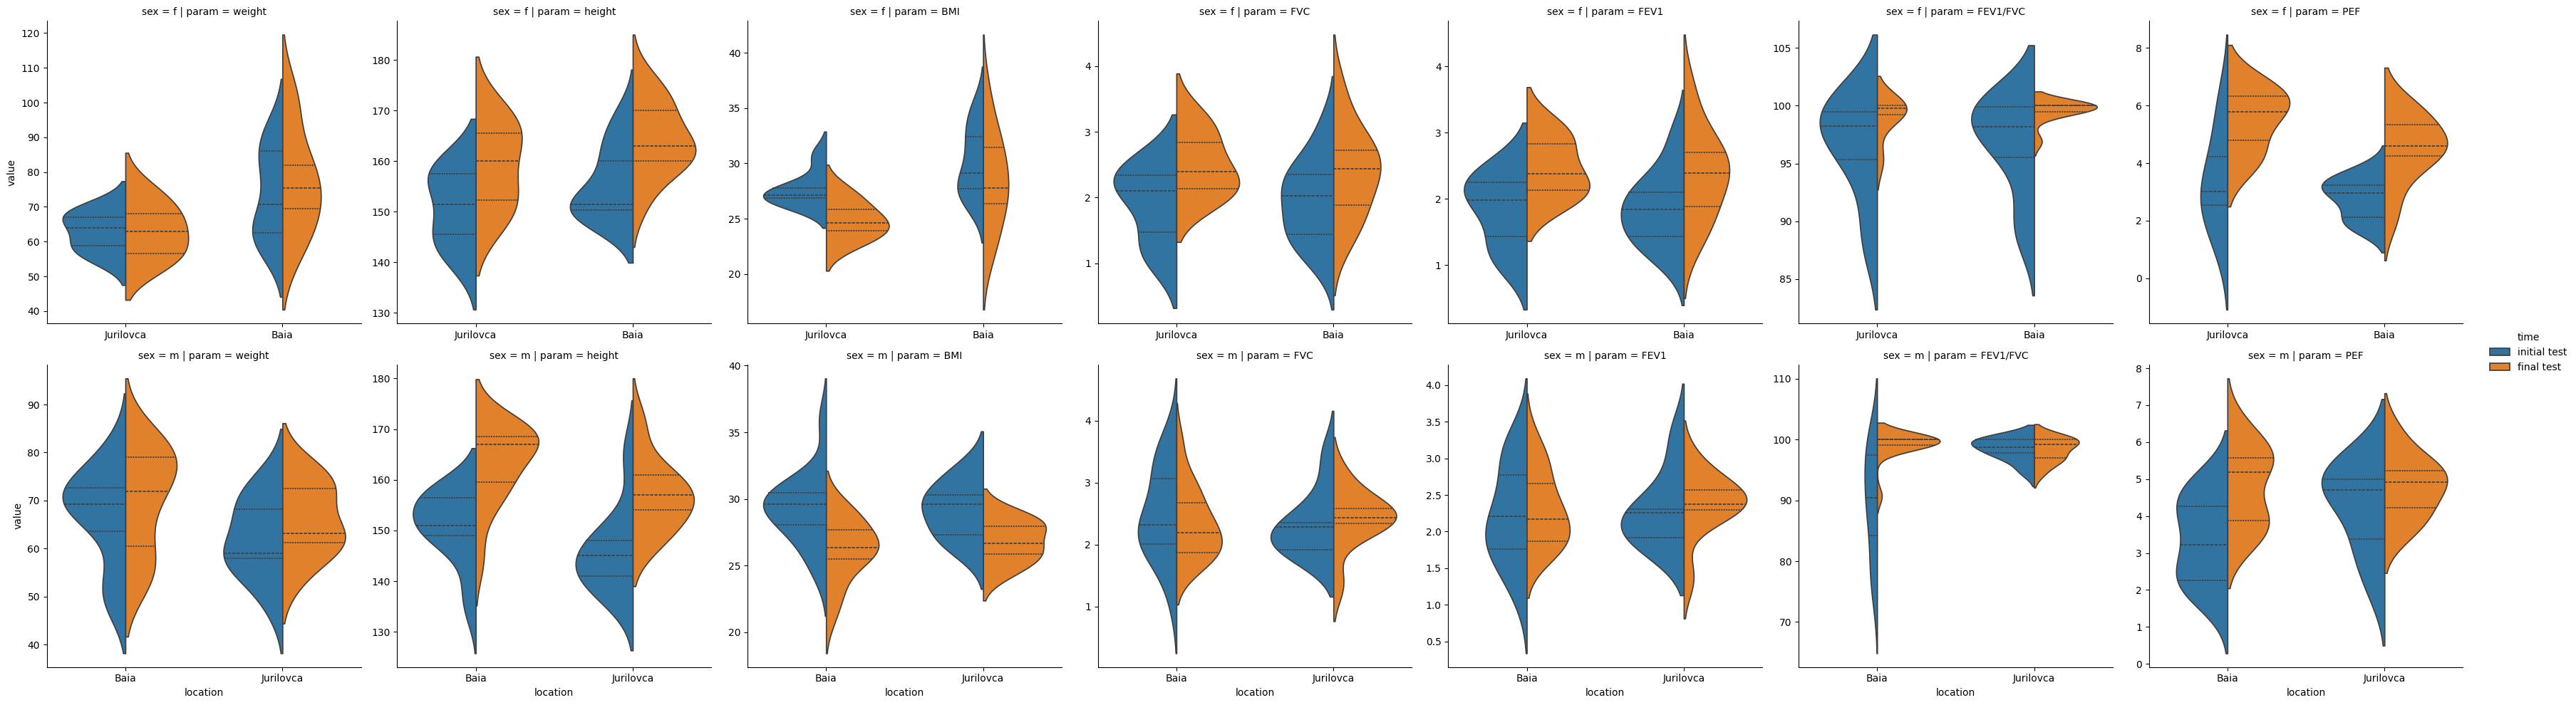

In [71]:
#mpl.pyplot.figure(figsize=(14,8))
sns.catplot(data=sm, x='location', y='value', row='sex', col = 'param', hue='time',
            sharex=False, sharey=False, 
            kind='violin', split=True, inner='quart')
# plt.savefig('spir-detailed-violin-quart.pdf')

<Axes: xlabel='sex', ylabel='value'>

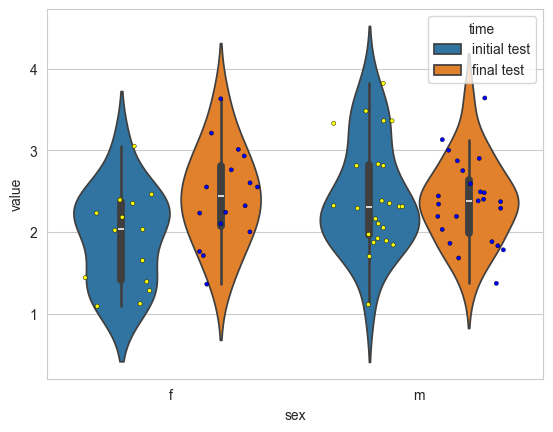

In [125]:
sns.set_style("whitegrid")
sns.violinplot(data=sm.loc[sm.param=='FVC'], x='sex', y='value', hue='time',
               split=False, inner='box', fill=True)
#sns.swarmplot(data=sm.loc[sm.param=='BMI'], x='sex', y='value', hue='time', palette='blend:#FF0,#00F',
#              size=3, dodge=True, edgecolor='black', linewidth=0.3)
sns.stripplot(data=sm.loc[sm.param=='FVC'], x='sex', y='value', hue='time', palette='blend:#FF0,#00F',
              size=3, dodge=True, edgecolor='black', linewidth=0.3, jitter=0.3, legend=False)

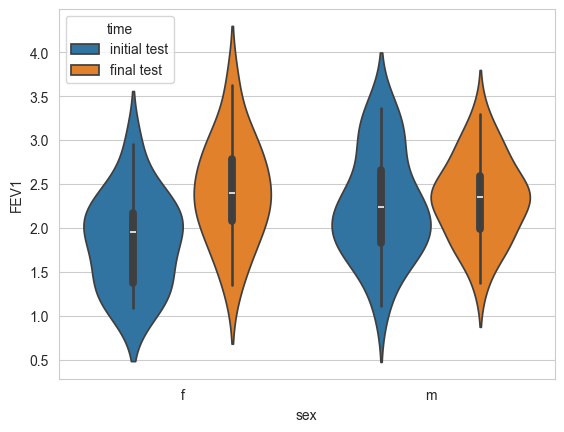

In [201]:
ax = sns.violinplot(data=sp, x='sex', y='FEV1', hue='time', hue_order=['initial test', 'final test'],
               split=False, inner='box', fill=True)
sns.move_legend(ax, "upper left")
#plt.savefig('FEV1.pdf')
#plt.savefig('FEV1.svg')

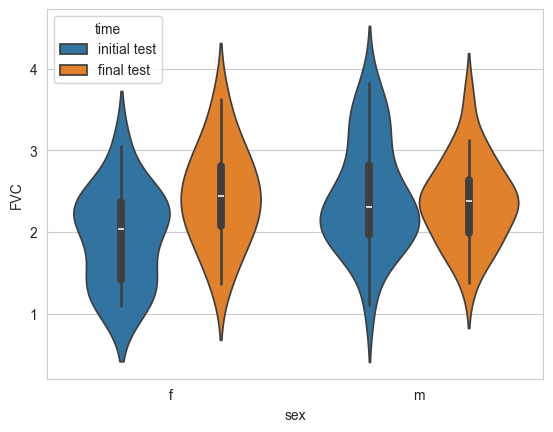

In [202]:
ax = sns.violinplot(data=sp, x='sex', y='FVC', hue='time', hue_order=['initial test', 'final test'],
               split=False, inner='box', fill=True)
sns.move_legend(ax, "upper left")
#plt.savefig('FVC.pdf')
#plt.savefig('FVC.svg')

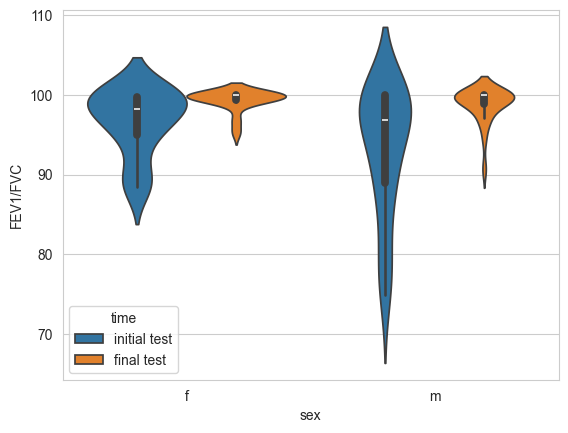

In [200]:
ax = sns.violinplot(data=sp, x='sex', y='FEV1/FVC', hue='time', hue_order=['initial test', 'final test'],
               split=False, inner='box', fill=True)
sns.move_legend(ax, "lower left")
#plt.savefig('FEV1-FVC.pdf')
#plt.savefig('FEV1-FVC.svg')
#sns.stripplot(data=sp, x='sex', y='FEV1/FVC', hue='time', palette='blend:#FF0,#00F', hue_order=['initial test', 'final test'],
#              size=3, dodge=True, edgecolor='black', linewidth=0.3, jitter=0.3, legend=True)

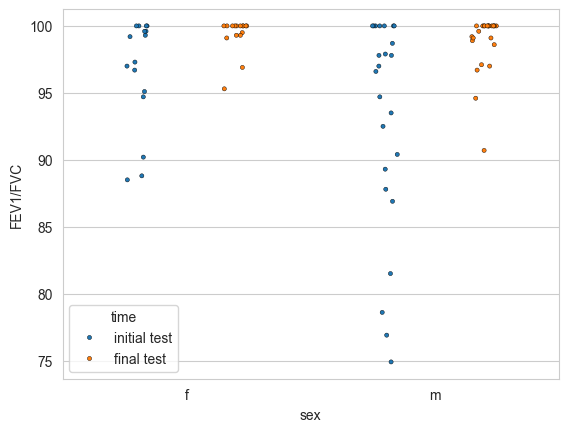

In [204]:
sns.stripplot(data=sp, x='sex', y='FEV1/FVC', hue='time', hue_order=['initial test', 'final test'],
              size=3, dodge=True, edgecolor='black', linewidth=0.3, legend=True)
#plt.savefig('FEV1-FVC-strip.pdf')
#plt.savefig('FEV1-FVC-strip.svg')

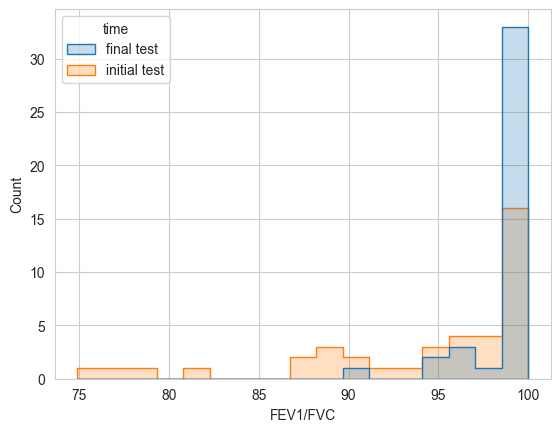

In [205]:
ax = sns.histplot(data=sp, x='FEV1/FVC', hue='time', stat='count', multiple='layer', element='step')
sns.move_legend(ax, "upper left")
# multiple : layer- dodge+ stack-- fill--
# element : bars- step+ poly+
#plt.savefig('FEV1-FVC-hist.pdf')
#plt.savefig('FEV1-FVC-hist.svg')

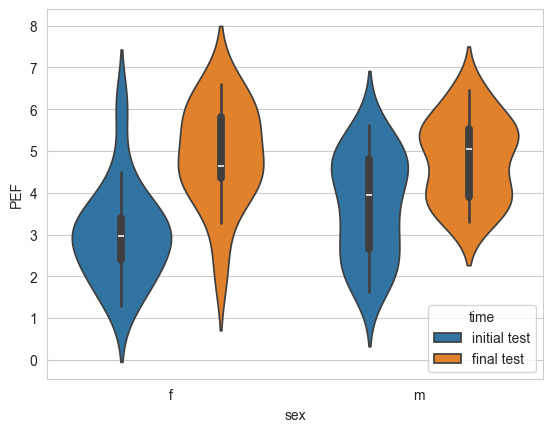

In [207]:
ax = sns.violinplot(data=sp, x='sex', y='PEF', hue='time', hue_order=['initial test', 'final test'],
               split=False, inner='box', fill=True)
sns.move_legend(ax, "lower right")
#plt.savefig('PEF.pdf')
#plt.savefig('PEF.svg')

In [218]:
sp.columns[7:]

Index(['FEV1', 'FVC', 'FEV1/FVC', 'PEF'], dtype='object', name='')

In [210]:
sp.time.unique()

array(['final test', 'initial test'], dtype=object)

In [215]:
[st.ttest_rel(sp.loc[sp.time=='final test', col], sp.loc[sp.time=='initial test', col]) for col in sp.columns[7:]]

[TtestResult(statistic=2.6197689885204007, pvalue=0.012471920821873508, df=39),
 TtestResult(statistic=nan, pvalue=nan, df=nan),
 TtestResult(statistic=4.2447582505313175, pvalue=0.00013083499004763207, df=39),
 TtestResult(statistic=7.0139802071645425, pvalue=2.050475918267769e-08, df=39)]

In [239]:
sp.loc[sp.FVC.isna()]

,name,sex,location,time,height,weight,BMI,FEV1,FVC,FEV1/FVC,PEF
67,s4,f,Baia,initial test,151.0,63.1,27.674225,1.71,NaN,100.0,2.59


In [240]:
sp.loc[sp.name=='s4']

,name,sex,location,time,height,weight,BMI,FEV1,FVC,FEV1/FVC,PEF
66,s4,f,Baia,final test,160.0,70.2,27.421875,1.35,1.36,99.3,4.61
67,s4,f,Baia,initial test,151.0,63.1,27.674225,1.71,NaN,100.0,2.59


In [241]:
st.ttest_rel(sp.loc[(sp.time=='final test') & (sp.name!='s4'), 'FVC'],
             sp.loc[(sp.time=='initial test') & (sp.name!='s4'), 'FVC'])

TtestResult(statistic=1.4825945519082073, pvalue=0.14642871419646844, df=38)

In [243]:
[cohen_glass_hedges(sp.loc[sp.time=='final test', col],
                    sp.loc[sp.time=='initial test', col])[0] for col in sp.columns[7:]]

[0.49346627757165235,
 0.2520293974537414,
 0.8927385511844643,
 1.2228121278000776]

In [251]:
cohen_glass_hedges(sp.loc[(sp.time=='final test') & (sp.name!='s4'), 'FVC'],
                   sp.loc[(sp.time=='initial test') & (sp.name!='s4'), 'FVC'])[0]

0.29989928724789217

In [254]:
[st.levene(sp.loc[sp.time=='final test', col],
           sp.loc[sp.time=='initial test', col], nan_policy='propagate') for col in sp.columns[7:]]

[LeveneResult(statistic=0.7537952474833925, pvalue=0.387940760278528),
 LeveneResult(statistic=nan, pvalue=nan),
 LeveneResult(statistic=17.627314109571827, pvalue=7.067629511290221e-05),
 LeveneResult(statistic=0.7175811514642519, pvalue=0.39953017747238684)]

In [252]:
st.levene(sp.loc[(sp.time=='final test') & (sp.name!='s4'), 'FVC'],
          sp.loc[(sp.time=='initial test') & (sp.name!='s4'), 'FVC'])

LeveneResult(statistic=1.2698777607403018, pvalue=0.2633350881189904)

In [255]:
s.columns

Index(['name', 'sex', 'location', 'weight_2023', 'weight_2024', 'height_2023',
       'height_2024', 'BMI_2023', 'BMI_2024', 'FVC_2023', 'FEV1_2023',
       'FEV1/FVC_2023', 'PEF_2023', 'FVC_2024', 'FEV1_2024', 'FEV1/FVC_2024',
       'PEF_2024'],
      dtype='object')

In [262]:
s[['weight_2023', 'weight_2024', 'height_2023',
       'height_2024', 'BMI_2023', 'BMI_2024', 'FVC_2023', 'FEV1_2023',
       'FEV1/FVC_2023', 'PEF_2023', 'FVC_2024', 'FEV1_2024', 'FEV1/FVC_2024',
       'PEF_2024']].agg(['count', 'median', 'mean', 'min', 'max', 'std', 'var',
    lambda x: st.kurtosis(x.copy()), lambda y: st.skew(y.copy()), lambda z: st.shapiro(z)[0],
                                      lambda z: st.shapiro(z)[1]]).round(2)

,weight_2023,weight_2024,height_2023,height_2024,BMI_2023,BMI_2024,FVC_2023,FEV1_2023,FEV1/FVC_2023,PEF_2023,FVC_2024,FEV1_2024,FEV1/FVC_2024,PEF_2024
count,40.00,40.00,40.00,40.00,40.00,40.00,39.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
median,67.45,70.15,150.50,161.00,28.74,26.34,2.23,2.02,97.15,3.24,2.38,2.35,100.00,4.80
mean,66.93,69.99,150.93,161.50,29.22,26.70,2.24,2.09,94.47,3.43,2.40,2.37,99.00,4.84
min,48.70,54.10,134.00,144.00,24.35,21.13,1.09,1.09,74.90,1.28,1.36,1.35,90.70,2.09
max,90.80,101.00,169.00,176.00,35.91,36.21,3.82,3.36,100.00,6.10,3.64,3.63,100.00,6.61
std,10.44,11.60,7.93,7.78,2.57,2.91,0.67,0.60,6.92,1.23,0.54,0.51,1.92,1.06
var,108.95,134.63,62.84,60.51,6.60,8.50,0.45,0.36,47.82,1.52,0.29,0.26,3.67,1.12
<lambda>,-0.20,0.28,-0.32,-0.74,0.14,1.52,NaN,-0.45,1.10,-0.90,-0.17,-0.24,7.54,-0.47
<lambda>,0.36,0.63,0.05,-0.31,0.66,0.78,NaN,0.33,-1.41,0.26,0.27,0.15,-2.66,-0.29
<lambda>,0.97,0.94,0.98,0.97,0.96,0.96,NaN,0.97,0.79,0.97,0.98,0.99,0.59,0.97


In [259]:
st.kurtosis(s.loc[s.name!='s4','FVC_2023'])

-0.20329029764619966

In [260]:
st.skew(s.loc[s.name!='s4','FVC_2023'])

0.35291429561743143

In [261]:
st.shapiro(s.loc[s.name!='s4','FVC_2023'])

ShapiroResult(statistic=0.9612987083150204, pvalue=0.1970037889204122)